## Computational Statistics Graded Assignment 1 


### Question 1 

To inspect the limitation of $R^2$ score in datasets with many features, we simulated the following scenario : 
> In each iteration of the simulation 
- We have an initial data which involves the target $y$ and a single $X$. 
- We train an initial linear regression model to fit a line to our dataset, and record Mean Squared Error on validation set and the $R^2$ metric. 
- We then expand our dataset by adding $n$ features one by one and record the metrics as well. 
- Then we observe and compare the resulting MSE and $R^2$ values with respect to varying feature numbers. 

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

def initial_data(row_size=1000,noise_level = 0.1):
    X = np.random.rand(row_size)
    #LLMs are used to get the syntax for addition of noise 
    y = 3 * X.squeeze() + np.random.randn(row_size) * 0.1
    data = pd.DataFrame({'X': X, 'y': y})
    return data


def linear_model(data):
    X = data.drop('y',axis=1)
    y = data['y']

    model = LinearRegression()

    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse = -scores.mean()  # cross_val_score returns negative MSE for sorting purposes (fixed using LLM) 
    model.fit(X, y)
    y_pred = model.predict(X)
    r_squared = r2_score(y, y_pred)
    mse_train = mean_squared_error(y, y_pred)
    
    return mse, r_squared,mse_train
        

def add_feature(data,name_index = 1):
    X_i = np.random.rand(len(data))
    data[f'X_{name_index}'] = X_i
    
    return data

def add_feature_and_linear_fit(feature_size = 50,row_size=1000):

    mse_dict={}
    r_squared_dict={}
    mse_train_dict={}

    data = initial_data()

    for i in range(0,feature_size):
        #print(f"number of features : {data.shape[1]}")
        mse,r_squared,mse_train= linear_model(data)
        mse_dict.update({i:mse})
        r_squared_dict.update({i:r_squared})
        mse_train_dict.update({i:mse_train})
        data = add_feature(data,name_index=i+1)
    
    return mse_dict, r_squared_dict,mse_train_dict



def run_monte_carlo_simulation(simulation_size=100, feature_size=50):
    mse_dict_list = []
    r_squared_dict_list = []
    mse_train_dict_list = []
    for i in range(0, simulation_size):
        print(f"****** Sim. iteration : {i} ******")
        mse_dict,r_squared_dict,mse_train_dict = add_feature_and_linear_fit(feature_size=feature_size)
        mse_dict_list.append(mse_dict)
        r_squared_dict_list.append(r_squared_dict)
        mse_train_dict_list.append(mse_train_dict)
    mse_df = pd.DataFrame(mse_dict_list)
    r_squared_df = pd.DataFrame(r_squared_dict_list)
    mse_train_df = pd.DataFrame(mse_train_dict_list)
    return mse_df, r_squared_df,mse_train_df



mse_df, r_squared_df,mse_train_df = run_monte_carlo_simulation(100, 50) 

****** Sim. iteration : 0 ******
****** Sim. iteration : 1 ******
****** Sim. iteration : 2 ******
****** Sim. iteration : 3 ******
****** Sim. iteration : 4 ******
****** Sim. iteration : 5 ******
****** Sim. iteration : 6 ******
****** Sim. iteration : 7 ******
****** Sim. iteration : 8 ******
****** Sim. iteration : 9 ******
****** Sim. iteration : 10 ******
****** Sim. iteration : 11 ******
****** Sim. iteration : 12 ******
****** Sim. iteration : 13 ******
****** Sim. iteration : 14 ******
****** Sim. iteration : 15 ******
****** Sim. iteration : 16 ******
****** Sim. iteration : 17 ******
****** Sim. iteration : 18 ******
****** Sim. iteration : 19 ******
****** Sim. iteration : 20 ******
****** Sim. iteration : 21 ******
****** Sim. iteration : 22 ******
****** Sim. iteration : 23 ******
****** Sim. iteration : 24 ******
****** Sim. iteration : 25 ******
****** Sim. iteration : 26 ******
****** Sim. iteration : 27 ******
****** Sim. iteration : 28 ******
****** Sim. iteration : 

If we see the average Mean Squared Error on validation set, we see that the error keeps increasing with the addition of random features, which is an indicator that our predictive performance decreases. 

In [2]:
## see the statistics of mean squared error with respect to varying feature sizes. 
mse_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.010026,0.010041,0.010055,0.010069,0.010082,0.010096,0.010109,0.010123,0.010136,0.010149,...,0.010571,0.010585,0.010602,0.010618,0.010633,0.010646,0.010666,0.010682,0.010698,0.010714
std,0.000423,0.000425,0.000426,0.000426,0.000429,0.000429,0.000432,0.000432,0.000434,0.000437,...,0.000459,0.000461,0.000461,0.000463,0.000464,0.000466,0.000470,0.000469,0.000471,0.000473
min,0.008988,0.009003,0.009007,0.009011,0.009002,0.008997,0.009007,0.009011,0.009024,0.009046,...,0.009390,0.009401,0.009460,0.009465,0.009475,0.009487,0.009496,0.009534,0.009546,0.009561
25%,0.009763,0.009757,0.009795,0.009803,0.009808,0.009811,0.009828,0.009863,0.009887,0.009868,...,0.010320,0.010319,0.010350,0.010399,0.010422,0.010420,0.010434,0.010444,0.010467,0.010482
50%,0.010025,0.010039,0.010059,0.010073,0.010069,0.010080,0.010082,0.010106,0.010128,0.010141,...,0.010571,0.010582,0.010593,0.010616,0.010618,0.010639,0.010652,0.010686,0.010700,0.010719
75%,0.010281,0.010293,0.010315,0.010324,0.010341,0.010365,0.010359,0.010365,0.010382,0.010402,...,0.010858,0.010902,0.010906,0.010937,0.010953,0.010978,0.011011,0.011009,0.011027,0.011025
max,0.010902,0.010920,0.010957,0.010988,0.011112,0.011132,0.011137,0.011202,0.011208,0.011279,...,0.011627,0.011651,0.011674,0.011684,0.011692,0.011710,0.011754,0.011793,0.011806,0.011829


If we see the average $R^2$ value as the feature number increases, we observe an increase in the $R^2$ value as well, which normally indicates that the variance explained by our predictive model increases. 

In [3]:
## see the statistics of r-squared score with respect to varying feature sizes. 
r_squared_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.986802,0.986814,0.986828,0.986841,0.986855,0.986866,0.986881,0.986892,0.986905,0.986919,...,0.987331,0.987346,0.987357,0.987372,0.987383,0.987398,0.987409,0.987420,0.987433,0.987445
std,0.000678,0.000679,0.000677,0.000677,0.000675,0.000675,0.000677,0.000676,0.000676,0.000674,...,0.000656,0.000659,0.000659,0.000660,0.000660,0.000663,0.000665,0.000665,0.000664,0.000664
min,0.984317,0.984323,0.984455,0.984455,0.984485,0.984488,0.984491,0.984519,0.984552,0.984614,...,0.984971,0.984982,0.984982,0.984983,0.984997,0.984997,0.984997,0.984997,0.985002,0.985002
25%,0.986432,0.986436,0.986454,0.986464,0.986470,0.986479,0.986481,0.986481,0.986490,0.986503,...,0.986930,0.986951,0.986968,0.986990,0.986997,0.987005,0.987009,0.987017,0.987021,0.987024
50%,0.986864,0.986888,0.986904,0.986917,0.986920,0.986923,0.986934,0.986937,0.986955,0.986997,...,0.987354,0.987364,0.987367,0.987386,0.987414,0.987433,0.987436,0.987441,0.987449,0.987458
75%,0.987191,0.987205,0.987207,0.987215,0.987216,0.987224,0.987225,0.987246,0.987273,0.987296,...,0.987663,0.987674,0.987706,0.987709,0.987723,0.987724,0.987731,0.987746,0.987759,0.987772
max,0.988499,0.988539,0.988544,0.988544,0.988546,0.988547,0.988561,0.988589,0.988595,0.988604,...,0.988977,0.988996,0.988996,0.989000,0.989005,0.989005,0.989016,0.989040,0.989040,0.989043


In the initial dataset (prior to feature addition), $X$ and $y$ have a linear relationship as we defined $y$ to be ($3 \times X + $ some random noise sampled from normal distribution) .However, the added features involve randomly generated values which possibly have a weaker correlation with the target variable $y$. Therefore, we could say that the increasing $R^2$ is misleading here, as train MSE keeps decreasing, while the MSE measured on the validation set is increasing. This is an indicator that our model, with introduction of higher dimensionality, learns the noise and overfits the data. Thus, we fail to make accurate predictions on unseen data. 

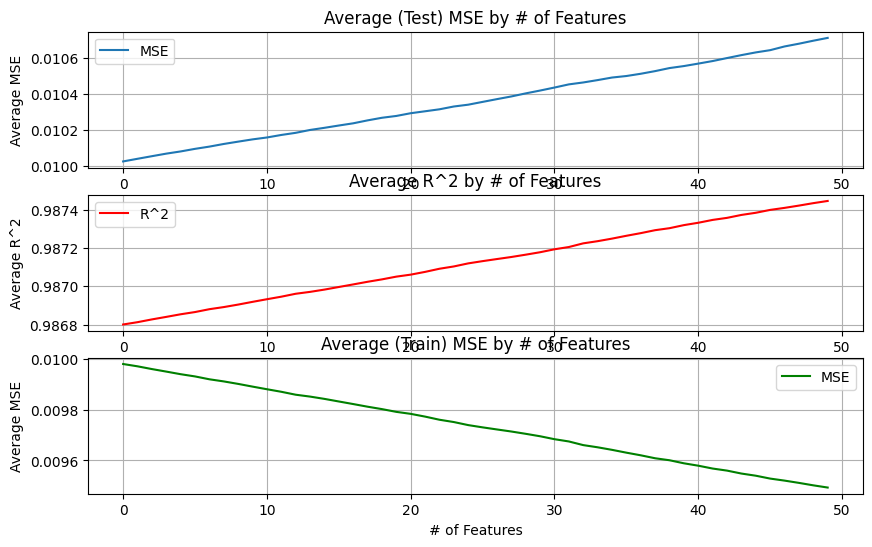

In [4]:
mean_mse_values = mse_df.mean()
r_squared_mean = r_squared_df.mean()
mean_mse_train = mse_train_df.mean()
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(10, 6))

ax1.plot(mean_mse_values)
ax1.set_ylabel('Average MSE')
ax1.set_title('Average (Test) MSE by # of Features') 
ax1.grid(True)
ax1.legend(['MSE'])

ax2.plot(r_squared_mean,color= 'red')
ax2.set_ylabel('Average R^2')
ax2.set_title('Average R^2 by # of Features') 
ax2.grid(True)
ax2.legend(['R^2'])

ax3.plot(mean_mse_train,color = 'green')
ax3.set_xlabel('# of Features')
ax3.set_ylabel('Average MSE')
ax3.set_title('Average (Train) MSE by # of Features') 
ax3.grid(True)
ax3.legend(['MSE'])


plt.show()


### Question 2 